# LOGISTIC REGRESSION
## 1. Data Exploration:
### a. Load the dataset and perform exploratory data analysis (EDA).
### b. Examine the features, their types, and summary statistics.
### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
### Analyze any patterns or correlations observed in the data.
## 2. Data Preprocessing:
### a. Handle missing values (e.g., imputation).
### b. Encode categorical variables.
## 3. Model Building:
### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
### b. Train the model using the training data.
## 4. Model Evaluation:
### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
## 5. Interpretation:
### a. Interpret the coefficients of the logistic regression model.
### b. Discuss the significance of features in predicting the target variable (survival probability in this case).
## 6. Deployment with Streamlit:
### In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

### (optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
### Detailed deployment instructions are available in the Streamlit Documentation.
### https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app 
## Interview Questions:
### 1. What is the difference between precision and recall?
### 2. What is cross-validation, and why is it important in binary classification?



In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# to get basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# to get basic stats

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# check for null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# target variable distribution

df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

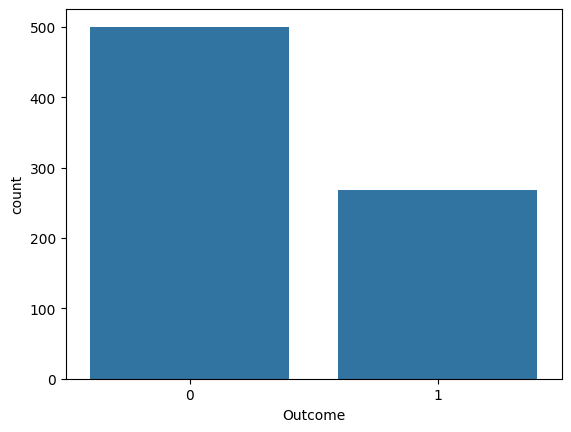

In [7]:
sns.countplot(x='Outcome',data=df)
plt.show()

<Figure size 1500x1000 with 0 Axes>

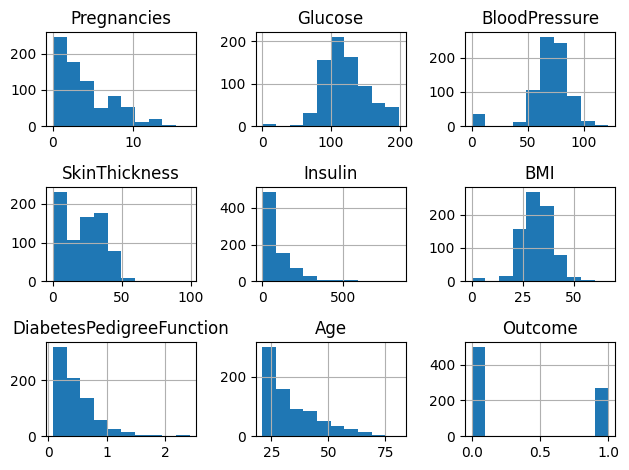

In [8]:
# histograms of features

plt.figure(figsize=(15,10))
df.hist()
plt.tight_layout()
plt.show()

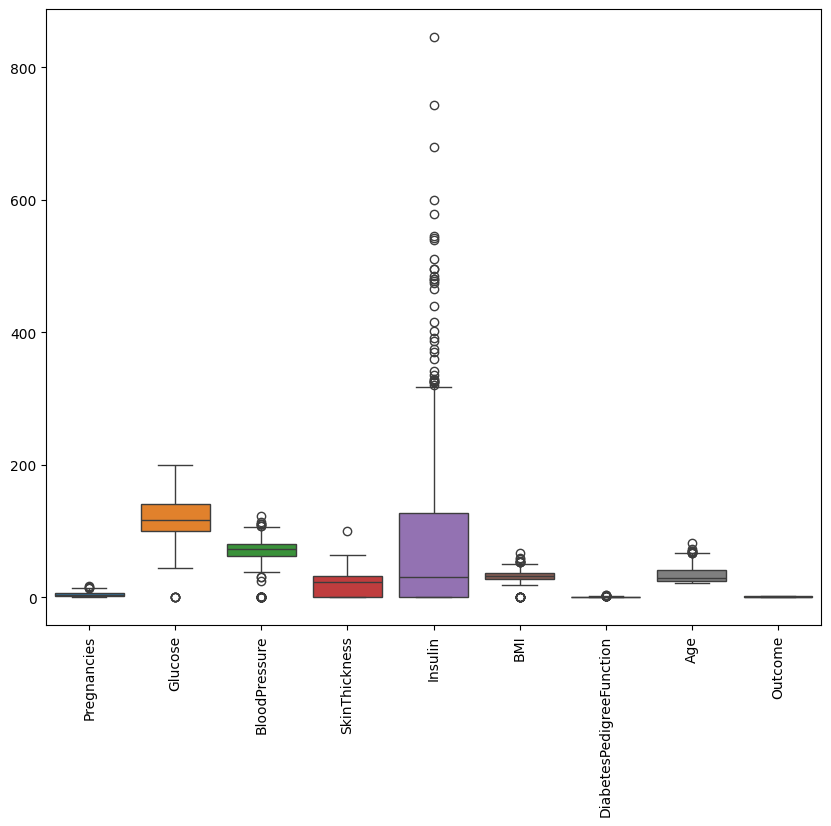

In [9]:
# outlier detection

plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

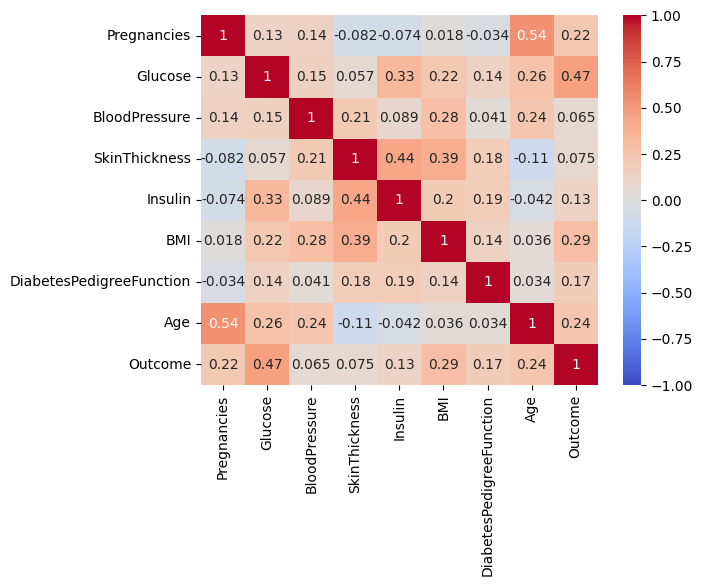

In [10]:
# correlation heatmap

sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm')
plt.show()

In [11]:
# Replace Invalid Zeros with NaN (Medical columns cannot have 0 values.)

cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df[cols] = df[cols].replace(0,np.nan)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
# check for null values (keep this null value -- we are filling this only after train test split (to prevent data leakage))

df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [13]:
# split the data

x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [14]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
# train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [17]:
# filling missing value
import warnings as wg
wg.filterwarnings('ignore')
for c in cols:
    med = x_train[c].median()
    x_train[c].fillna(med,inplace=True)
    x_test[c].fillna(med,inplace=True)

In [18]:
# feature scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [19]:
# using Logistic Regression with auto picking cv to improve output

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(
    Cs=20,
    cv=5,
    scoring='roc_auc',
    class_weight='balanced',
    solver='liblinear',
    max_iter=2000
)

lr.fit(x_train, y_train)

,"Cs Cs: int or list of floats, default=10Each of the values in Cs describes the inverse of regularizationstrength. If Cs is as an int, then a grid of Cs values are chosenin a logarithmic scale between 1e-4 and 1e4.Like in support vector machines, smaller values specify strongerregularization.",20
,"l1_ratios l1_ratios: array-like of shape (n_l1_ratios), default=NoneFloats between 0 and 1 passed as Elastic-Net mixing parameter (scaling betweenL1 and L2 penalties). For `l1_ratio = 0` the penalty is an L2 penalty. For`l1_ratio = 1` it is an L1 penalty. For `0 < l1_ratio < 1`, the penalty is acombination of L1 and L2.All the values of the given array-like are tested by cross-validation and theone giving the best prediction score is used... warning:: Certain values of `l1_ratios`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... deprecated:: 1.8 `l1_ratios=None` is deprecated in 1.8 and will raise an error in version 1.10. Default value will change from `None` to `(0.0,)` in version 1.10.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"cv cv: int or cross-validation generator, default=NoneThe default cross-validation generator used is Stratified K-Folds.If an integer is provided, it specifies the number of folds, `n_folds`, used.See the module :mod:`sklearn.model_selection` module for thelist of possible cross-validation objects... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer dual=False whenn_samples > n_features.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet'}, default='l2'Specify the norm of the penalty:- `'l2'`: add a L2 penalty term (used by default);- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"scoring scoring: str or callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: :ref:`accuracy ` is used.",'roc_auc'
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` problems (`n_classes >= 3`), all solvers except 'liblinear' minimize the full multinomial loss, 'liblinear' will raise an error.- 'newton-cholesky' is a good choice for `n_samples` >> `n_features * n_classes`, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on `n_features * n_classes` because it explicitly computes the full Hessian matrix.- For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones;- 'liblinear' might be slower in :class:`LogisticRegressionCV` because it does not handle warm-starting.- 'liblinear' can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclas

In [20]:
pred = lr.predict(x_test)
pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [21]:
prob = lr.predict_proba(x_test)[:,1]
prob

array([0.7212604 , 0.22525337, 0.44535079, 0.38849831, 0.06307014,
       0.28549631, 0.65632984, 0.9548878 , 0.14060421, 0.89956114,
       0.40146338, 0.61277743, 0.20639368, 0.19362641, 0.39484544,
       0.49598489, 0.8228572 , 0.13920911, 0.87126765, 0.19439283,
       0.265116  , 0.86945386, 0.27971665, 0.96066351, 0.70187311,
       0.02689285, 0.76776055, 0.0763417 , 0.45079427, 0.06660949,
       0.08141931, 0.07224163, 0.61326226, 0.80160694, 0.92663301,
       0.2295928 , 0.4895866 , 0.10997752, 0.86798735, 0.75435125,
       0.45307688, 0.18793465, 0.17071898, 0.40263514, 0.25166915,
       0.56918666, 0.21447127, 0.18057487, 0.81348541, 0.47495183,
       0.74001114, 0.81071279, 0.60479164, 0.10889736, 0.66524442,
       0.5209304 , 0.83288082, 0.35267514, 0.86099335, 0.24252217,
       0.89195402, 0.35460883, 0.09031021, 0.92963191, 0.05995097,
       0.2908886 , 0.93362517, 0.03448147, 0.42350591, 0.80408353,
       0.28206528, 0.16320141, 0.4973935 , 0.61094186, 0.06412

In [25]:
# evaluation 

from sklearn.metrics import accuracy_score , classification_report , roc_auc_score , roc_curve 

print('Accuracy Score : ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print('ROC AUC : ' ,roc_auc_score(y_test,prob))

Accuracy Score :  0.7272727272727273
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

ROC AUC :  0.8114814814814816


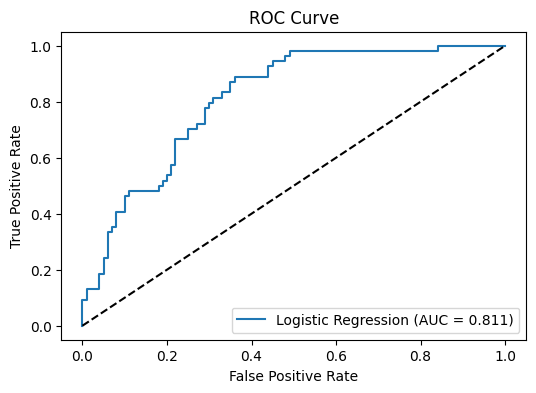

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %.3f)" % roc_auc_score(y_test, prob))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [27]:
# ODDS RATIO INTERPRETATION

odds_ratio = np.exp(lr.coef_[0])

coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": lr.coef_[0],
    "Odds_Ratio": odds_ratio
}).sort_values(by="Odds_Ratio", ascending=False)

coef_df

,Feature,Coefficient,Odds_Ratio
1,Glucose,1.114621,3.048414
5,BMI,0.660681,1.936110
0,Pregnancies,0.349779,1.418754
6,DiabetesPedigreeFunction,0.274122,1.315375
7,Age,0.187343,1.206041
3,SkinThickness,0.033379,1.033942
2,BloodPressure,-0.000725,0.999275
4,Insulin,-0.017787,0.982371


In [28]:
import pickle
pickle.dump(lr, open("diabetes_model.pkl","wb"))
pickle.dump(ss, open("scaler.pkl","wb"))